In [1]:
##Lab 1 : Source Coding

#Question 1

import numpy as np
from math import log

def entropy(x):
    n_x = len(x)

    if n_x <= 1:
        return 0

    ##Obtenir le vecteur des probas
    value,counts = np.unique(x, return_counts=True)
    probs = counts / n_x
    
    ##Calcul de l'entropie
    entropy = 0.
    for i in probs:
        entropy -= i * log(i,2)

    return entropy

x = [1,0,0,1,0,1,1,0,1,1,0,1]

print ("Question 1: Calcul de l'entropie de :",x,"vaut", entropy(x))
print ("")

Question 1: Calcul de l'entropie de : [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1] vaut 0.9798687566511527



In [2]:
##Question 2
import random

def check_entropy(t):
    r = []
    for a in range(t):
        r.append(random.randint(0,1))
    return entropy(r)

t = 10000
print("Question 2: Pour un vecteur de taille", t,", l'entropie vaut",check_entropy(t))   

Question 2: Pour un vecteur de taille 10000 , l'entropie vaut 0.9998704709626944


Question 3: Tracer la variation d'entropie en fonction de a = P[X=0]


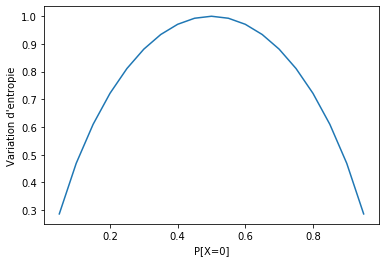

In [4]:
##Question 3

import matplotlib.pyplot as plt

def variations_entropy(leng):
    tab_probs = [] 
    tab_entropy = []  
    
    for j in range(leng-1):
        tab = []
        for i in range(leng):
            if i <= j:
                tab.append(1)
            else:
                tab.append(0)
          
        ## Compter le nombre de 0 et de 1 et caluler leurs probas
        value,counts = np.unique(tab, return_counts=True)
        probs = counts / len(tab)
        
        ##On construit les 2 vecteurs qu'on veut plot
        tab_probs.append(probs[0])         ##vecteurs P[X=0]
        tab_entropy.append(entropy(tab))   ##vecteurs des variations de l'entropie
        
    ## plot
    plt.plot(tab_probs,tab_entropy)
    plt.ylabel("Variation d'entropie")
    plt.xlabel("P[X=0]")

print("Question 3: Tracer la variation d'entropie en fonction de a = P[X=0]")
variations_entropy(20)
        

In [5]:
##Question 4

print("p0 = p01/(1-p00+p01)")
print("p1 = (1-p00)/(1-p00+p01)")

print("H(Sk) = -(p00*log2(p00) + p10*log2(p10))*p0-(p01*log2(p01)+p11*log2(p11))*p1")

    


p0 = p01/(1-p00+p01)
p1 = (1-p00)/(1-p00+p01)
H(Sk) = -(p00*log2(p00) + p10*log2(p10))*p0-(p01*log2(p01)+p11*log2(p11))*p1


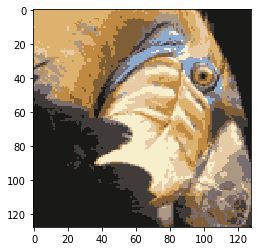

In [5]:
##Lab 2 Lossy Image Compression

##Question 1,2,3

from matplotlib.pyplot import imread,imsave,imshow
from sklearn.cluster import KMeans
import numpy as np

 
k = 10

img = imread("bird_small.tiff")
height,width,depth = img.shape
 
img_ = img.reshape(height*width,3) #nouvelle vue de l'image comme un tableau à deux dimesion Npixels x 3

r = []
g = []
b = []
for a in range(np.shape(img_)[0]): ##on récupère les vecteurs red green et blue (cf Lab 3)
    r.append(img_[a][0])
    g.append(img_[a][1])
    b.append(img_[a][2])

kmeans = KMeans(n_clusters = k, random_state = 0).fit(img_) # calcul les k moyennes
label = kmeans.labels_
new = kmeans.cluster_centers_[label,:]

new_ = new.reshape(img.shape)
imshow(new_.astype('uint8'))



In [16]:
##Question 4

print("Le coding rate R(k) vaut log2(k) arrondi à l'entier supérieur")
print("Par exemple pour k=6, il faut 3 bits pour coder les différents pixels.")

Le coding rate R(k) vaut log2(k) arrondi à l'entier supérieur
Par exemple pour k=6, il faut 3 bits pour coder les différents pixels.


[74168694.7325928, 42503768.469825715, 29270681.867846563, 23670586.84511469, 19398086.352262177, 16917702.761942234, 14871163.159458319, 13554521.71220348, 12225220.488263352, 11100841.282155024, 10100745.933817917, 9368154.364106093, 8724685.883115726, 8124419.508765994, 7655261.703897513, 7264699.526149284, 6886252.364919776, 6550127.987386466, 6257481.9769388]


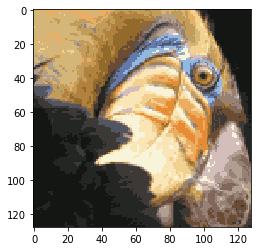

In [12]:
from matplotlib.pyplot import imread,imsave,imshow
from sklearn.cluster import KMeans
import numpy as np


img = imread("bird_small.tiff")
height,width,depth = img.shape
 
img_ = img.reshape(height*width,3) #nouvelle vue de l'image comme un tableau à deux dimesion Npixels x 3
distortion = []
for k in range(2,21):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(img_) # calcul les k moyennes
    label = kmeans.labels_
    distortion.append(kmeans.inertia_)
print(distortion)

new = kmeans.cluster_centers_[label,:]
new_ = new.reshape(img.shape)
imshow(new_.astype('uint8'))

On voit que la distorsion décroit avec le nombre de clusters.
Comme attendu car plus on a de centroïdes plus la distance des points d'origine à ces centroïdes diminuent.


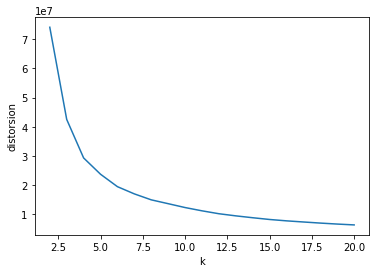

In [15]:
##Question 5

plt.plot([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],distortion)
plt.xlabel("k")
plt.ylabel("distorsion")
print("On voit que la distorsion décroit avec le nombre de clusters.")
print("Comme attendu car plus on a de centroïdes plus la distance des points d'origine à ces centroïdes diminuent.")

In [7]:
##Lab 3 Mutual information calculation

##Question 1

import numpy as np
import warnings
warnings.filterwarnings('ignore')

def jointEntropy(X, Y):
    probs = []
    for c1 in set(X):
        for c2 in set(Y):
            probs.append(np.mean(np.logical_and(X == c1, Y == c2)))
    return np.sum(-p * np.log2(p) for p in probs if p > 0)


def I(x,y):
    return entropy(x) + entropy(y) - jointEntropy(x,y)


                  
x = np.array([1,0,0,1,1,1,1,0,1,1,0,1])
y = np.array([0,0,1,1,0,0,0,0,1,0,0,1])


res = I(x,y)
print("L'information mutuelle entre les 2 vecteurs vaut :", res)


L'information mutuelle entre les 2 vecteurs vaut : 0.011580457284801948


In [8]:
##Question 2

Irg = I(r,g)
Irb = I(r,b)
Ibg = I(b,g)

print(Irg, Irb, Ibg)
print("Le minimum d'information mutuelle est atteint pour les vecteurs red et blue")

3.2130085997198012 2.6495812228898714 2.87439198099292
Le minimum d'information mutuelle est atteint pour les vecteurs red et blue
